In [1]:
import sys
sys.path.append('/home/pocha/Documents/fraud_analysis/')

In [2]:
from scripts.predict_pipeline import predict
from src.config import RAW_DATA_PATH, LABELS_DATA_PATH, MODEL_PATH, REPORT_PATH, PROCESSED_DATA_PATH
from src.data_ingestion import load_data, preprocess_transaction_data, split_data
from src.utils import (
    load_model
)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc, confusion_matrix, 
                             classification_report, precision_recall_curve, 
                             RocCurveDisplay, PrecisionRecallDisplay)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


In [12]:
os.getcwd()

'/home/pocha/Documents/fraud_analysis/notebooks'

In [3]:
df_transaction = load_data(f'/home/pocha/Documents/fraud_analysis/data/raw/transactions_obf.csv', f'/home/pocha/Documents/fraud_analysis/data/raw/labels_obf.csv')
df_transaction = preprocess_transaction_data(df_transaction)

# Split data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df_transaction)


In [4]:
model = load_model('/home/pocha/Documents/fraud_analysis/models/Random Forest_best_model.pkl')


Model loaded from /home/pocha/Documents/fraud_analysis/models/Random Forest_best_model.pkl


In [7]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score



# Predict and save predictions
y_pred, y_pred_proba, accuracy = predict(model, X_test, y_test, threshold=0.1)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f'Test Accuracy: {accuracy}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)
print(f'F1 Score: {f1}')

Test Accuracy: 0.9904741833508957
ROC AUC Score: 0.9904569002123143
Confusion Matrix:
[[23353   197]
 [   29   146]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23550
           1       0.43      0.83      0.56       175

    accuracy                           0.99     23725
   macro avg       0.71      0.91      0.78     23725
weighted avg       0.99      0.99      0.99     23725

F1 Score: 0.5637065637065637


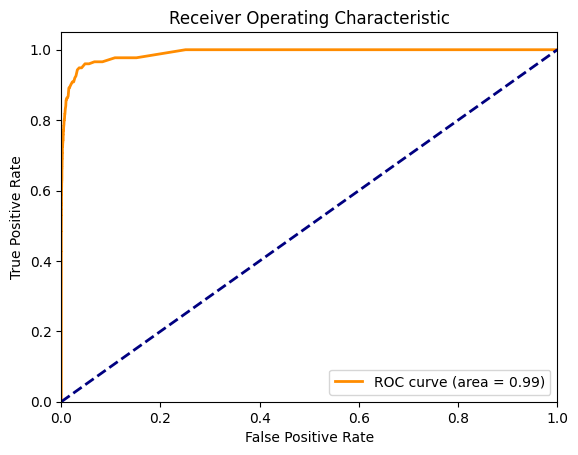

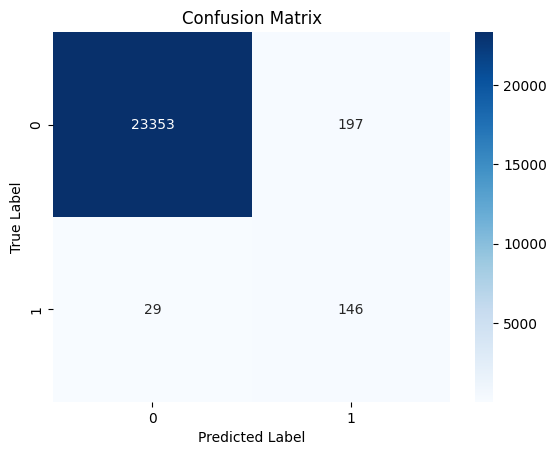

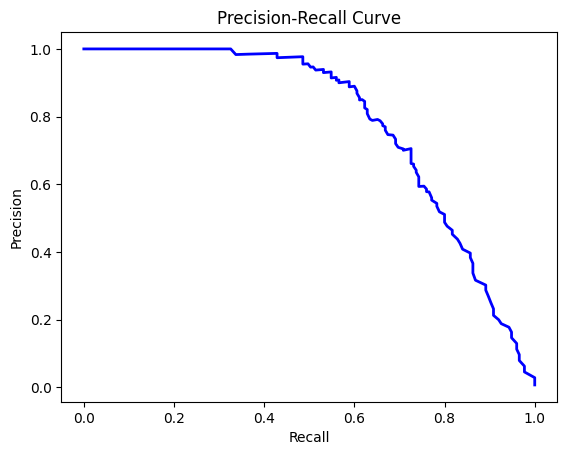

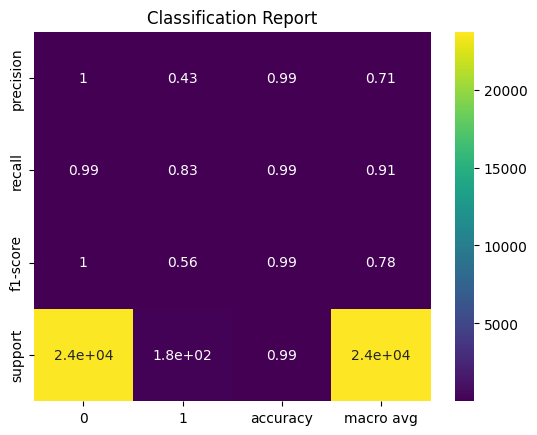

In [8]:




# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plot Classification Report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()
plt.figure()
sns.heatmap(classification_df.iloc[:-1, :].T, annot=True, cmap='viridis')
plt.title('Classification Report')
plt.show()


In [17]:
import altair as alt
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
roc_data = pd.DataFrame({
    'False Positive Rate': fpr,
    'True Positive Rate': tpr
})
roc_curve = alt.Chart(roc_data).mark_line(color='darkorange').encode(
    x='False Positive Rate',
    y='True Positive Rate'
).properties(
    title=f'ROC Curve (AUC = {roc_auc:.2f})'
) + alt.Chart(pd.DataFrame({'x': [0, 1], 'y': [0, 1]})).mark_line(color='navy', strokeDash=[5, 5]).encode(
    x='x:Q',
    y='y:Q'
)
roc_curve.display()







alt.LayerChart(...)

In [17]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])
conf_matrix_chart = alt.Chart(conf_matrix_df.reset_index().melt('index')).mark_rect().encode(
    x='variable:O',
    y='index:O',
    color='value:Q'
).properties(
    title='Confusion Matrix'
).interactive()
conf_matrix_chart

alt.Chart(...)

In [18]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_data = pd.DataFrame({
    'Precision': precision,
    'Recall': recall
})
pr_curve = alt.Chart(pr_data).mark_line(color='blue').encode(
    x='Recall',
    y='Precision'
).properties(
    title='Precision-Recall Curve'
)
pr_curve


alt.Chart(...)

In [20]:
# Plot Classification Report
alt.renderers.enable('default')
classification_rep = classification_report(y_test, y_pred, output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose().reset_index()
classification_chart = alt.Chart(classification_df).mark_bar().encode(
    x='index',
    y='precision'
).properties(
    title='Classification Report - Precision'
)
classification_chart

alt.Chart(...)